In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as c
import astropy.units as u

# Kim & Elmegreen (2017) rotation curve
## $$ v(R) = 215 + 95\tanh\left(\frac{R-70}{60}\right) -50\log_{10}R + 1.5\left(\log_{10}R\right)^3 $$

In [3]:
def vc_KE17(R):
    return 215 + 95*np.tanh((R-70)/60) - 50*np.log10(R) + 1.5*(np.log10(R))**3

# Galactic potential from Launhardt et al. (2002)

* IRAS ad COBE DIRBE data at $2.2$ and $240\,\mu m$
* NSC + NSD + GB

## NSC

#### The density profile
### $$ \rho(r) = \frac{\rho_0}{1+(r/r_0)^n} $$
#### $n=2$ for $r < 6\,{\rm pc}$ and $n=3$ for $r > 6\,{\rm pc}$ with proper scaling to match $\rho$ at $r=6\,{\rm pc}$.

#### The enclosed mass is
### $$ M(r) = M_0\left[\frac{r}{r_0} - \tan^{-1}\left(\frac{r}{r_0}\right)\right] \quad\quad\text{when $r < 6\,{\rm pc}$}$$
### $$ M(r) = M(r=6\,{\rm pc}) + M_0\log\left[ \frac{1+(r/r_0)^3}{1+(6{\,\rm pc}/r_0)^3} \right]^{1/3} \quad\quad\text{when $r > 6\,{\rm pc}$} $$

#### The gravitational potential
### $$ \Phi(r) = -\frac{GM(r)}{r} $$

#### The circular velocity
### $$ v_c = \sqrt{\frac{GM(r)}{r} - 4\pi G \rho(r) r^2} $$

In [4]:
def rho_NSC(r):
    M = np.zeros(len(r))
    msk = r < r1
    ri = r[msk]
    ro = r[~msk]
    M[msk] = M0*((ri/r0).value - np.arctan(ri/r0).value)
    M[~msk] = M0*((r1/r0).value - np.arctan(r1/r0).value) + \
      fac*M0*(1./3.)*np.log((1.+(ro/r0).value**3)/(1.+(r1/r0)**3))
    return M
def Minc_NSC(r):
    r0 = 0.22*u.pc
    rho0 = 3.3e6*u.Msun/u.pc**3
    M0 = 4*np.pi*r0**3*rho0
    fac = (1 + (6/0.22)**3 ) / (1 + (6/0.22)**2)
    r1 = 6*u.pc
    M = np.zeros(len(r))
    msk = r < r1
    ri = r[msk]
    ro = r[~msk]
    M[msk] = M0*((ri/r0).value - np.arctan(ri/r0).value)
    M[~msk] = M0*((r1/r0).value - np.arctan(r1/r0).value) + \
      fac*M0*(1./3.)*np.log((1.+(ro/r0).value**3)/(1.+(r1/r0)**3))
    return M
def Minc_NSC_simple(r):
    """ n=3 component only """
    r0 = 0.22*u.pc
    rho0 = 3.3e7*u.Msun/u.pc**3
    M = 4*np.pi*r0**3*rho0/3 * np.log(1+(r/r0)**4)
    return M

(100000.0, 5000000000.0)

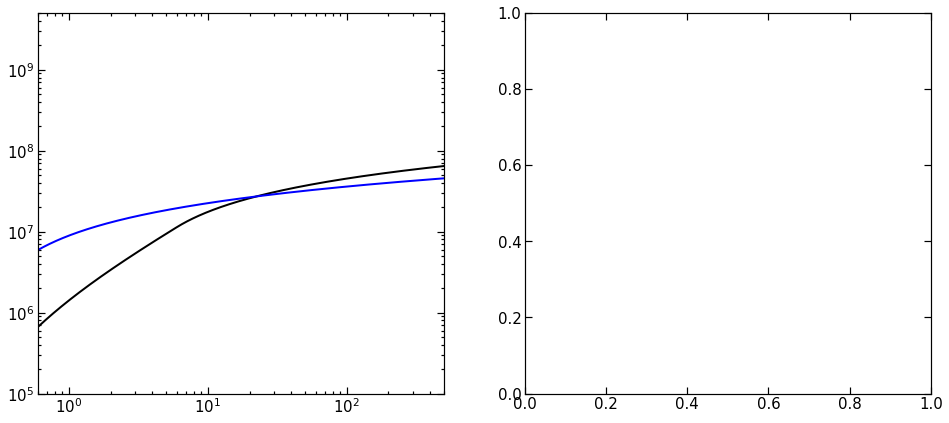

In [5]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
r = np.logspace(np.log10(0.6),np.log10(5e2),1000)*u.pc
M = Minc_NSC(r)
ax[0].loglog(r,M)
ax[0].loglog(r, Minc_NSC_simple(r))
ax[0].set_xlim(0.6,5e2)
ax[0].set_ylim(1e5,5e9)

# Kruijssen, Dale, & Longmore (2015)

## $M_{\rm enc} = M_0\left(\frac{R}{R_0}\right)^\beta$
## $\Phi(x,y,z) = \frac{GM_0}{R_0}\left(\frac{1}{\beta-1}\right)\left[\left(\frac{x}{R_0}\right)^2+\left(\frac{y}{R_0}\right)^2+\left(\frac{z}{q_\Phi R_0}\right)^2\right]^\frac{\beta-1}{2}$
## $v_{\rm circ} = \sqrt{\frac{GM_0}{R_0}}\left(\frac{R}{R_0}\right)^\frac{\beta-1}{2}$

Text(0,0.5,'$v_{\\rm circ}$')

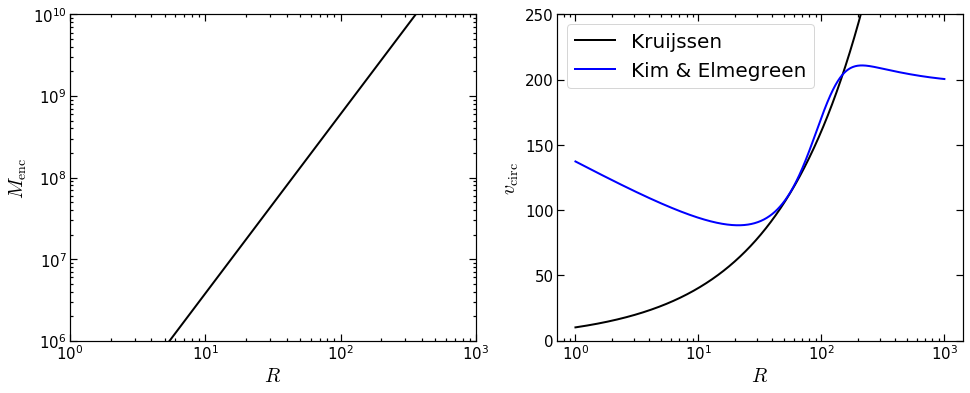

In [6]:
def vc_KDL15(R):
    M0 = 6e8
    R0 = 100
    beta = 2.2
    q = 0.63
    G = 0.00430092
    Menc = M0*(R/R0)**beta
    Phi = G*M0/R0/(beta-1)*(R/R0)**(beta-1)
    vcirc = np.sqrt(G*M0/R0)*(R/R0)**(0.5*(beta-1))
    return vcirc
M0 = 6e8
R0 = 100
beta = 2.2
q = 0.63
G = 0.00430092
x = np.logspace(0,3,1000)
Menc = M0*(x/R0)**beta
Phi = G*M0/R0/(beta-1)*(x/R0)**(beta-1)
vcirc = np.sqrt(G*M0/R0)*(x/R0)**(0.5*(beta-1))
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].loglog(x,Menc)
ax[0].set_xlabel(r"$R$")
ax[0].set_ylabel(r"$M_{\rm enc}$")
ax[0].set_xlim(1e0,1e3)
ax[0].set_ylim(1e6,1e10)
ax[1].semilogx(x,vcirc, label="Kruijssen")
ax[1].semilogx(x,vc_KE17(x), label="Kim & Elmegreen")
ax[0].set_xlim(1e0,1e3)
ax[1].set_ylim(0,250)
ax[1].legend()
ax[1].set_xlabel(r"$R$")
ax[1].set_ylabel(r"$v_{\rm circ}$")

# Stolte et al. (2008)
## $\Phi = 0.5v_0^2\log\left(R_c^2+\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}\right)$
## $\rho = \frac{v_0^2}{4\pi G}\frac{1}{R_c^2+(x/a)^2+(y/b)^2+(z/c)^2}\left[a^{-2}+b^{-2}+c^{-2}-\frac{2(x^2/a^4+y^2/b^4+z^2/c^4)}{R_c^2+(x/a)^2+(y/b)^2+(z/c)^2}\right]$
## $v_c = v_0\sqrt{\frac{(R/R_c)^2}{(R/R_c)^2+1}}$
### NSC : $a=b=c=1$, $R_c=2\,{\rm pc}$, $v_0 = 98.6\,{\rm km\,s^{-1}}$
### NSD : $a=b=1$, $c=0.71$, $R_c=90\,{\rm pc}$, $v_0 = 190\,{\rm km\,s^{-1}}$
### Bar : $a=c=0.75$ and $b=1$, $R_c=90\,{\rm pc}$, $v_0 = 190\,{\rm km\,s^{-1}}$


In [7]:
def rho_S08(x,y,z,a,b,c,Rc,v0):
    fourpiG = 0.05404692
    return v0**2/fourpiG/(Rc**2+(x/a)**2+(y/b)**2+(z/c)**2)*(a**-2+b**-2+c**-2-2*(x**2/a**4+y**2/b**4+z**2/c**4)/(Rc**2+(x/a)**2+(y/b)**2+(z/c)**2))
def Phi_S08(x,y,z,a,b,c,Rc,v0):
    return 0.5*v0**2*np.log(Rc**2+(x/a)**2+(y/b)**2+(z/c)**2)
def vc_S08(R,Rc,v0):
    return v0*np.sqrt((R/Rc)**2/((R/Rc)**2+1.0))

In [8]:
x = np.linspace(-281.8706742, 281.8706742, 1024)
z = np.linspace(-118.68238914, 118.68238914, 1024)
R = np.linspace(1,500,1000)
rho_tot = rho_S08(x[:,None],0,z[None,:],1,1,1,2,98.6) + rho_S08(x[:,None],0,z[None,:],1,1,0.71,90,190)
vc_KE = vc_KE17(R)
vc_ST = np.sqrt(vc_S08(R,2,98.6)**2 + vc_S08(R,90,190)**2 + vc_S08(R,90,190)**2)
vc_S = np.sqrt(vc_S08(R,50,80)**2 + vc_S08(R,150,270)**2)
#vc_S = np.sqrt(vc_S08(R,170,330)**2)

Text(0,0.5,'$v_{\\rm circ}$')

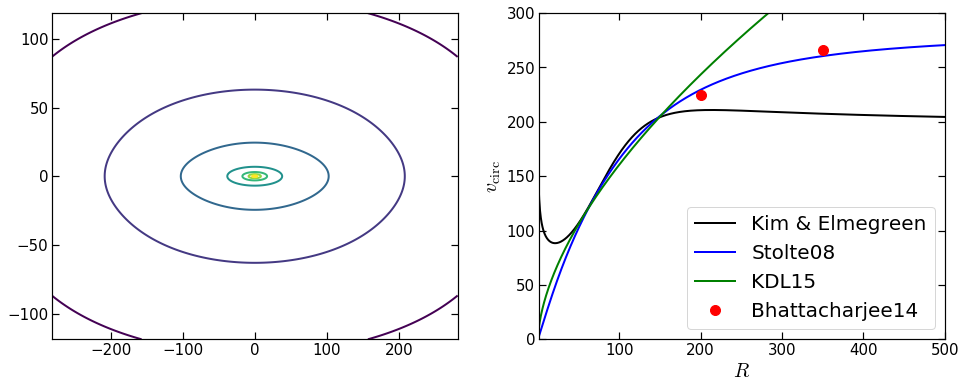

In [9]:
rp = np.array([200,350])
vp = np.array([225,266])
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].contour(x,z,np.log10(rho_tot))
ax[1].plot(R,vc_KE, label="Kim & Elmegreen")
ax[1].plot(R,vc_S, label="Stolte08")
ax[1].plot(R,vc_KDL15(R), label="KDL15")
ax[1].plot(rp, vp, 'o', label="Bhattacharjee14")
ax[1].set_xlim(1,500)
ax[1].set_ylim(0,300)
ax[1].legend()
ax[1].set_xlabel(r"$R$")
ax[1].set_ylabel(r"$v_{\rm circ}$")

# Modified Hubble
## $\Phi = -\frac{4\pi G \rho_{\rm bul} R_{\rm b}^3}{R}\ln\left(\frac{R}{R_{\rm b}}+\sqrt{1 + \frac{R^2}{R_{\rm b}^2}}\right)$
## $v_c^2 = 4\pi G \rho_{\rm bul} R_{\rm b}^2\left[\frac{R_{\rm b}}{R}\ln\left(\frac{R}{R_{\rm b}}+\sqrt{1+\frac{R^2}{R_{\rm b}^2}}\right) - \frac{1}{\sqrt{1+R^2/R_{\rm b}^2}} \right]$
## $\rho(r) = \frac{\rho_b}{(1+r^2/r_b^2)^{3/2}}$
### $\rho_{\rm bul} = 1$
### $R_{\rm b} = 300\,{\rm pc}$

In [10]:
def Phi_MH(R,R_b,rho_b):
    xi = R/R_b
    fourpiG = 0.05404692
    return -fourpiG*rho_b*R_b**2*np.log(xi+np.sqrt(1+xi**2))/xi
def vc_MH(R,R_b,rho_b):
    xi = R/R_b
    fourpiG = 0.05404692
    return np.sqrt(fourpiG*rho_b*R_b**2*(np.log(xi+np.sqrt(1+xi**2))/xi - 1./np.sqrt(1+xi**2)))

Text(0,0.5,'$v_{\\rm circ}$')

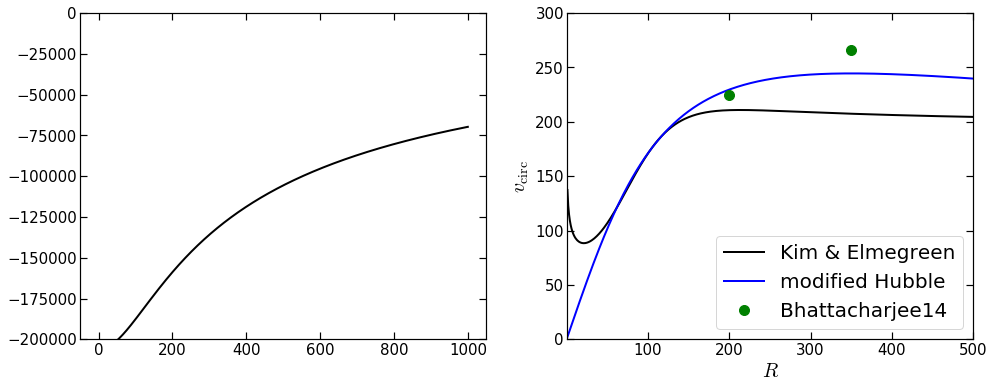

In [13]:
R = np.linspace(1,1000,1000)
vc_KE = vc_KE17(R)
R_b = 120
rho_b = 265
vc = vc_MH(R,R_b,rho_b)
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(R,Phi_MH(R,R_b,rho_b))
ax[0].set_ylim(-200000,0)

ax[1].plot(R,vc_KE, label="Kim & Elmegreen")
ax[1].plot(R,vc, label="modified Hubble")

rp = np.array([200,350])
vp = np.array([225,266])
ax[1].plot(rp, vp, 'o', label="Bhattacharjee14")

ax[1].set_xlim(1,500)
ax[1].set_ylim(0,300)
ax[1].legend()
ax[1].set_xlabel(r"$R$")
ax[1].set_ylabel(r"$v_{\rm circ}$")

# Modified Hubble - larger ring

Text(0,0.5,'$v_{\\rm circ}$')

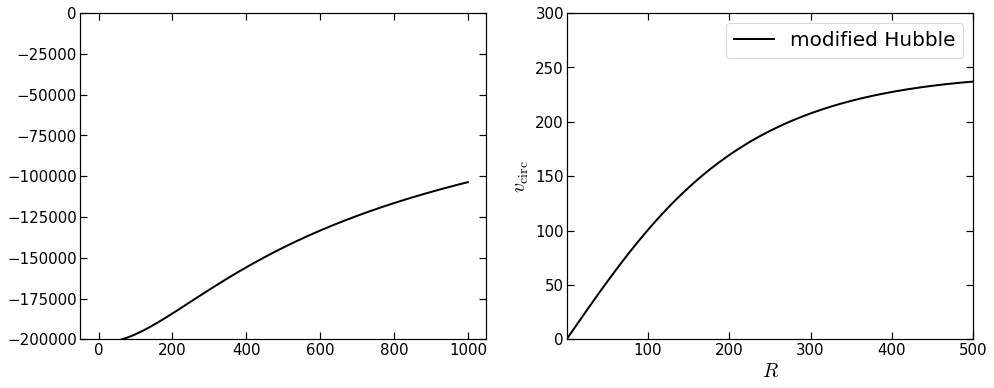

In [34]:
R = np.linspace(1,1000,1000)
vc_KE = vc_KE17(R)
R_b = 240
rho_b = 65
vc = vc_MH(R,R_b,rho_b)
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(R,Phi_MH(R,R_b,rho_b))
ax[0].set_ylim(-200000,0)

ax[1].plot(R,vc, label="modified Hubble")

rp = np.array([200,350])
vp = np.array([225,266])

ax[1].set_xlim(1,500)
ax[1].set_ylim(0,300)
ax[1].legend()
ax[1].set_xlabel(r"$R$")
ax[1].set_ylabel(r"$v_{\rm circ}$")